In [2]:
from tensorflow import keras
from tensorflow.keras.datasets import imdb
 
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
print(train_data[100])

[1, 13, 244, 6, 87, 337, 7, 628, 2219, 5, 28, 285, 15, 240, 93, 23, 288, 549, 18, 1455, 673, 4, 241, 534, 3635, 8448, 20, 38, 54, 13, 258, 46, 44, 14, 13, 1241, 7258, 12, 5, 5, 51, 9, 14, 45, 6, 762, 7, 2, 1309, 328, 5, 428, 2473, 15, 26, 1292, 5, 3939, 6728, 5, 1960, 279, 13, 92, 124, 803, 52, 21, 279, 14, 9, 43, 6, 762, 7, 595, 15, 16, 2, 23, 4, 1071, 467, 4, 403, 7, 628, 2219, 8, 97, 6, 171, 3596, 99, 387, 72, 97, 12, 788, 15, 13, 161, 459, 44, 4, 3939, 1101, 173, 21, 69, 8, 401, 2, 4, 481, 88, 61, 4731, 238, 28, 32, 11, 32, 14, 9, 6, 545, 1332, 766, 5, 203, 73, 28, 43, 77, 317, 11, 4, 2, 953, 270, 17, 6, 3616, 13, 545, 386, 25, 92, 1142, 129, 278, 23, 14, 241, 46, 7, 158]


In [4]:
train_labels[0]

1

In [5]:
 max([max(sequence) for sequence in train_data]) 

9999

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [7]:
import numpy as np

In [8]:
def vectorize_sequences(sequences, dimension=10000):     
    results = np.zeros((len(sequences), dimension))      
    for i, sequence in enumerate(sequences):         
        results[i, sequence] = 1.      
    return results

In [9]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
print(x_train)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [11]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [12]:
print(y_train)

[1. 0. 0. ... 0. 1. 0.]


In [13]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [14]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
model.compile(optimizer='rmsprop',               
              loss='binary_crossentropy',               
              metrics=['accuracy'])#评价函数

In [16]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [17]:
model.compile(optimizer='rmsprop',               
              loss='binary_crossentropy',               
              metrics=['acc'])

In [18]:
history = model.fit(partial_x_train,                     
                    partial_y_train,                     
                    epochs=20,                     
                    batch_size=512,                     
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 264us/step - loss: 0.4963 - acc: 0.7881 - val_loss: 0.3723 - val_acc: 0.8686
Epoch 2/20
15000/15000 [==============================] - 2s 156us/step - loss: 0.2889 - acc: 0.9051 - val_loss: 0.3015 - val_acc: 0.8871
Epoch 3/20
15000/15000 [==============================] - 2s 155us/step - loss: 0.2108 - acc: 0.9305 - val_loss: 0.2764 - val_acc: 0.8932
Epoch 4/20
15000/15000 [==============================] - 2s 148us/step - loss: 0.1679 - acc: 0.9445 - val_loss: 0.2793 - val_acc: 0.8861
Epoch 5/20
15000/15000 [==============================] - 2s 148us/step - loss: 0.1343 - acc: 0.9573 - val_loss: 0.2829 - val_acc: 0.8863
Epoch 6/20
15000/15000 [==============================] - 2s 150us/step - loss: 0.1131 - acc: 0.9643 - val_loss: 0.3030 - val_acc: 0.8850
Epoch 7/20
15000/15000 [==============================] - 2s 150us/step - loss: 0.0929 - acc: 0.9729 - val_loss: 0.3193 - 

In [20]:
 history_dict = history.history 

In [21]:
 history_dict.keys() 

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [22]:
import matplotlib.pyplot as plt 

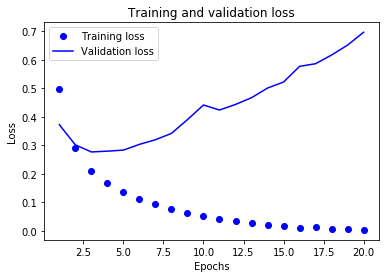

In [24]:
history_dict = history.history 
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss'] 
 
epochs = range(1, len(loss_values) + 1) 
 
plt.plot(epochs, loss_values, 'bo', label='Training loss')   
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')   
plt.title('Training and validation loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 
 
plt.show()


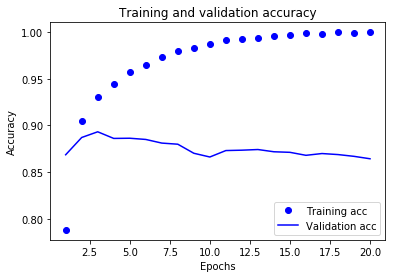

In [25]:
plt.clf()    
acc = history_dict['acc']  
val_acc = history_dict['val_acc'] 
 
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.legend() 
 
plt.show()

In [26]:
model = models.Sequential() 
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) 
model.add(layers.Dense(16, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid')) 
 
model.compile(optimizer='rmsprop',               
              loss='binary_crossentropy',              
              metrics=['accuracy']) 
 
model.fit(x_train, y_train, epochs=4, batch_size=512) 
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 4s 159us/step - loss: 0.4703 - acc: 0.8146
Epoch 2/4
25000/25000 [==============================] - 4s 143us/step - loss: 0.2678 - acc: 0.9084
Epoch 3/4
25000/25000 [==============================] - 3s 138us/step - loss: 0.2051 - acc: 0.9275
Epoch 4/4
25000/25000 [==============================] - 5s 193us/step


In [27]:
 results 

[0.3009917719554901, 0.87896]

In [30]:
model.predict(x_test)

array([[0.2200909 ],
       [0.9991979 ],
       [0.9200472 ],
       ...,
       [0.18021826],
       [0.11102722],
       [0.7716224 ]], dtype=float32)

大于0.99或小于0.01表示非常确信，其他表示不是那么确信